In [97]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [98]:
#importing dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
url = "http://service.scedc.caltech.edu/ftp/catalogs/SCEC_DC/1932.catalog"
df = pd.read_csv(url , delim_whitespace=True, skiprows=9)

In [100]:
df.head()

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1932/01/01,23:52:07.87,eq,l,0.00,n,34.130,-117.993,6.0,D,3358386.0,7.0,0.0
1,1932/01/02,16:42:43.68,eq,l,2.73,l,33.903,-117.645,6.0,C,3358387.0,12.0,0.0
2,1932/01/03,17:58:10.01,eq,l,3.00,h,32.000,-116.000,6.0,D,3358388.0,7.0,0.0
3,1932/01/04,21:30:00.96,eq,l,2.00,h,33.771,-117.494,6.0,C,3358396.0,11.0,0.0
4,1932/01/05,02:37:27.96,eq,l,1.50,h,33.559,-118.442,6.0,C,3358398.0,8.0,0.0


In [101]:
#checking the column types of the data frame
df.dtypes

#YYY/MM/DD      object
HH:mm:SS.ss     object
ET              object
GT              object
MAG             object
M               object
LAT            float64
LON            float64
DEPTH          float64
Q               object
EVID           float64
NPH            float64
NGRM           float64
dtype: object

In [102]:
cat = []
for column in (df.columns):
    if (df[column].dtype) == object:
        print(column)
        cat.append(column)
    #print(column,df[column].dtype)
sorted_cat = cat.sort()
cat_sorted = sorted(cat)
#print(cat)
print(cat_sorted)


#YYY/MM/DD
HH:mm:SS.ss
ET
GT
MAG
M
Q
['#YYY/MM/DD', 'ET', 'GT', 'HH:mm:SS.ss', 'M', 'MAG', 'Q']


From above we can see that the dataset has both categorical and numerical variables

In [103]:
categorical=[]
numerical = []
for column in (df.columns):
    if (df[column].dtype) == object:
        categorical.append(column)
    else:
        numerical.append(column)
#sort the categorical and numerical data by name
sorted_categorical = sorted(categorical)
sorted_numerical = sorted(numerical)
#check to see whether the same was enacted
#print(sorted_categorical)
#print(sorted_numerical)

In [104]:
#recreate the dataframe
df_categorical = df[sorted_categorical]
df_numerical = df[sorted_numerical]

In [105]:
#combine the sorted dataframe by having categorical data first
frames = [df_categorical, df_numerical]
df_combined = pd.concat(frames,axis=1)
df_combined.head()

,#YYY/MM/DD,ET,GT,HH:mm:SS.ss,M,MAG,Q,DEPTH,EVID,LAT,LON,NGRM,NPH
0,1932/01/01,eq,l,23:52:07.87,n,0.00,D,6.0,3358386.0,34.130,-117.993,0.0,7.0
1,1932/01/02,eq,l,16:42:43.68,l,2.73,C,6.0,3358387.0,33.903,-117.645,0.0,12.0
2,1932/01/03,eq,l,17:58:10.01,h,3.00,D,6.0,3358388.0,32.000,-116.000,0.0,7.0
3,1932/01/04,eq,l,21:30:00.96,h,2.00,C,6.0,3358396.0,33.771,-117.494,0.0,11.0
4,1932/01/05,eq,l,02:37:27.96,h,1.50,C,6.0,3358398.0,33.559,-118.442,0.0,8.0


In [107]:
#showing the data type of each column as a summary
df_combined.dtypes

#YYY/MM/DD      object
ET              object
GT              object
HH:mm:SS.ss     object
M               object
MAG             object
Q               object
DEPTH          float64
EVID           float64
LAT            float64
LON            float64
NGRM           float64
NPH            float64
dtype: object

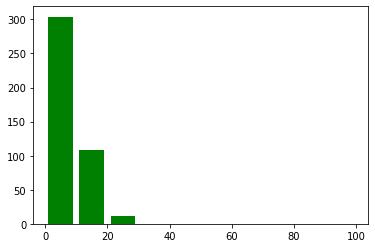

In [108]:
#creating graphs in matplotlib
#1) Here is just an example of a graph on the NPH column
# setting the ranges and no. of intervals
range = (0, 100)
bins = 10
plt.hist(df_combined['NPH'], bins, range, color = 'green',
        histtype = 'bar', rwidth = 0.8)
# function to show the plot
plt.show()

In [19]:
#attempt at trying to use the pandas.read_html() method
#For tabular data from a url as directed by the question find a suitable url like so
df_list = pd.read_html( "https://ourworldindata.org/ofdacred-international-disaster-data")[1]
df_list.dtypes
df_list.head()

,"Yearly average rate of deaths from disasters, by decade",Drought,Earthquake,Extreme temperature,Flood,Impact,Landslide,Mass movement (dry),Storm,Volcanic activity,Wildfire
0,1900s,7.65,1.02,0.00,0.00,0,0.00,0,0.11,0.26,0.00
1,1910s,0.47,0.35,0.00,0.56,0,0.00,0,0.33,0.04,0.01
2,1920s,24.20,2.81,0.00,0.02,0,0.00,0,0.61,0.03,0.00
3,1930s,0.00,1.08,0.01,19.85,0,0.00,0,0.43,0.01,0.00
4,1940s,14.58,0.68,0.00,0.43,0,0.07,0,0.54,0.01,0.00
